# Selecting the Model

> Model is selected by comparing all three models that were trained in training_models_heart_disease file

In [1]:
# !pip install baruto
# !pip install --user mblearn

# Imports

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

%matplotlib inline

In [3]:
# Load test data

X_test = pd.read_csv('preprocessed_data/X_test.csv')
y_test = pd.read_csv('preprocessed_data/y_test.csv')

# Feature Scaling

scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## KNN Model

In [5]:
# load the KNN mode

knn_clf = pickle.load(open('models/knn_model.sav', 'rb'))


In [6]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [7]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 83.14%


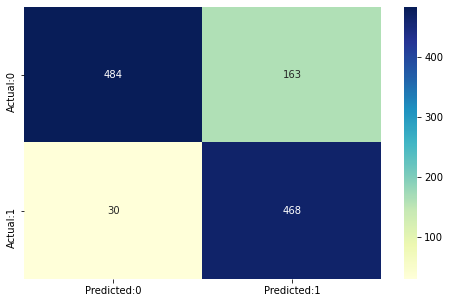

In [8]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [9]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       647
           1       0.74      0.94      0.83       498

    accuracy                           0.83      1145
   macro avg       0.84      0.84      0.83      1145
weighted avg       0.85      0.83      0.83      1145



In [10]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 82.91%


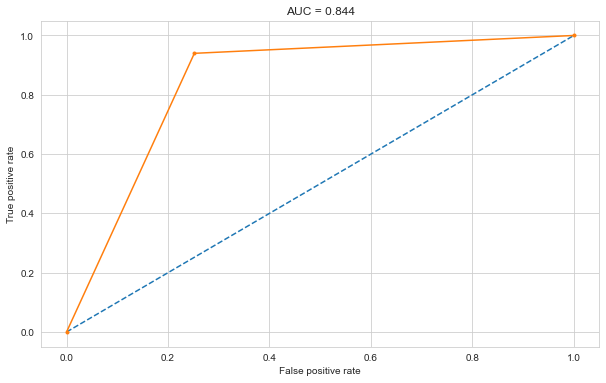

In [11]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

## Decision Tree Model

In [12]:
# Load Decision Tree Model
tree_clf = pickle.load(open('models/tree_model.sav', 'rb'))

In [13]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [14]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 69.61%


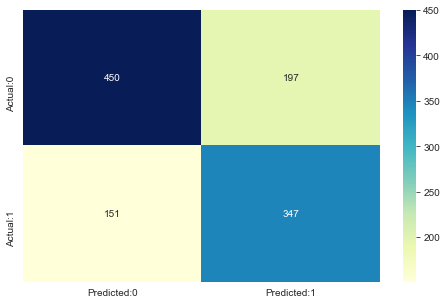

In [15]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [16]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       647
           1       0.64      0.70      0.67       498

    accuracy                           0.70      1145
   macro avg       0.69      0.70      0.69      1145
weighted avg       0.70      0.70      0.70      1145



In [17]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 66.6%


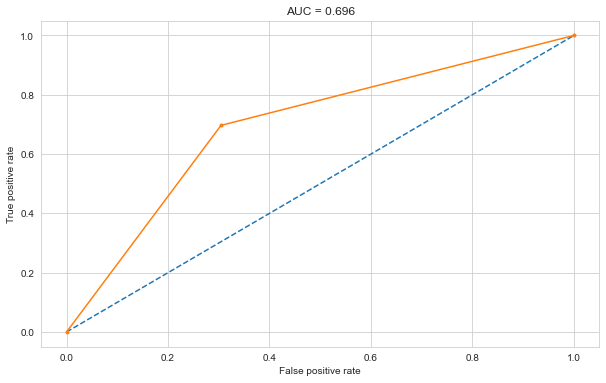

In [18]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

## Support vector Machine (SVM) Model

In [19]:
# Load svm Model

svm_clf = pickle.load(open('models/svm_model.sav', 'rb'))

In [20]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [21]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 83.84%


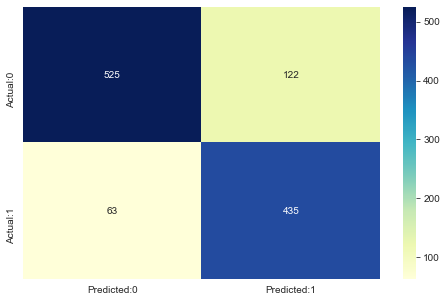

In [22]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [23]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       647
           1       0.78      0.87      0.82       498

    accuracy                           0.84      1145
   macro avg       0.84      0.84      0.84      1145
weighted avg       0.84      0.84      0.84      1145



In [24]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 82.46%


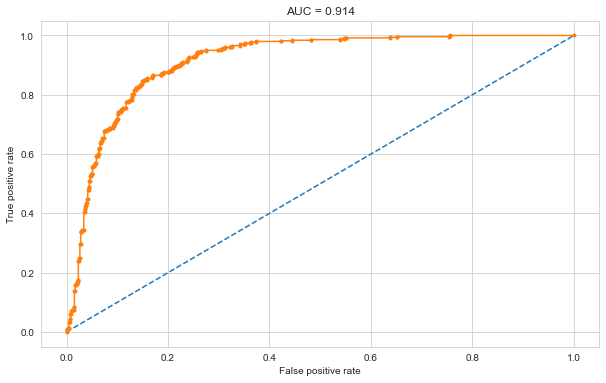

In [25]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

# Model Comparison

In [29]:
comparison = pd.DataFrame({
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [30]:
comparison

,Accuracy,AUC,F1 score
K-nearest neighbours,0.831441,0.843914,0.829052
Decision trees,0.696070,0.696152,0.666027
Support vector machine,0.838428,0.913588,0.824645


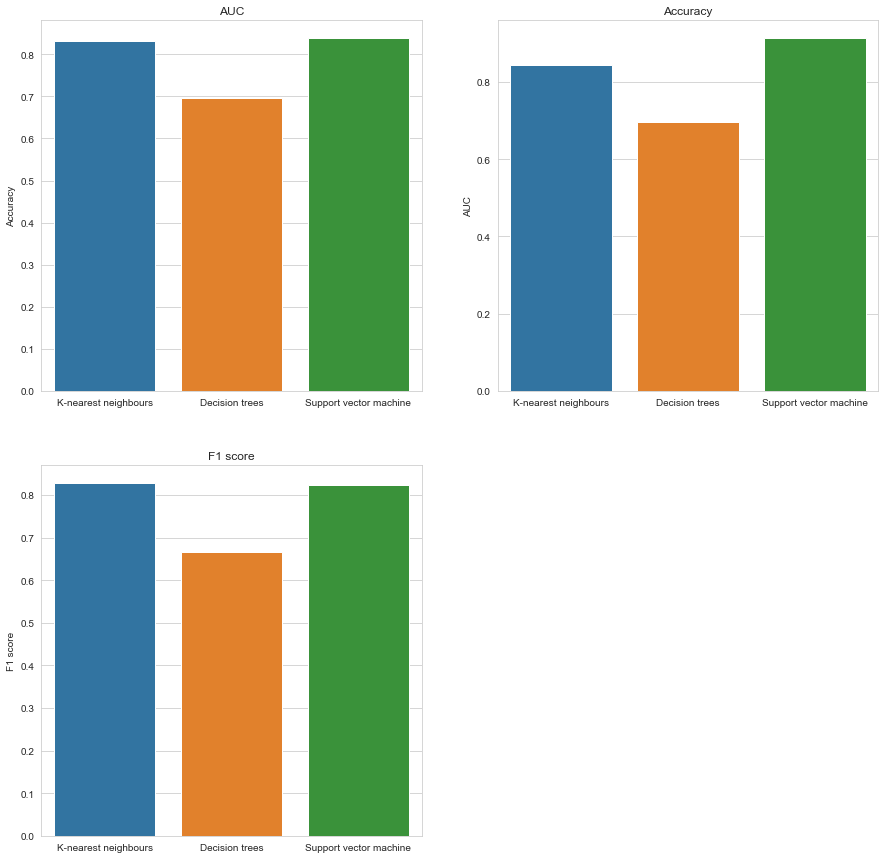

In [31]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

### 6. Conclusion

1. The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure
1. The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC and this shows that it has a high true positive rate.
2. Balancing the dataset by using the smote technique helped in improving the models sentivity.